# Natural Language Processing

In [4]:
import numpy as np
import pandas as pd
import nltk # natural langurage tool kit
import re # regualr expressions
from nltk.corpus import stopwords

In [5]:
from nltk.stem import PorterStemmer

In [6]:
stop = stopwords.words('english')
stop.remove('not') # in sentiment analyis this not stop word
stop.append('srikanth') # you customize stopwords like this

**Step -1 : Load Dataset**

In [7]:
dataset = pd.read_excel('data.xlsx')

In [8]:
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


** Step -2 : Cleaning text , steming, removing stopwords**

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [10]:
text = dataset['Review']

In [11]:
review = text[0]
review

'Wow... Loved this place.'

In [12]:
data = []
for i in range(len(dataset)):
    review = text[i] # change into i
    # step -1: converting letter into lower case
    review = review.lower()
    # step -2: removing special character and numerics
    review = re.sub('[^a-z]',' ',review)
    # step -3: convert sentence into list of words -> tokens
    review = review.split()
    # step -4: Stemming(extracting root word) and removing stopwords
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stop)]
    review = ' '.join(review)# step 5: joining words 
    data.append(review) # appending data
    

**Step- 3 : Bag of word model**
- CountVectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

In [14]:
cv = CountVectorizer()

In [15]:
# Converting words into numbers (Word Embedding)
X = cv.fit_transform(data).toarray() # all the clean stentence are in my data
y = dataset['Liked'].values 

In [16]:
print(len(cv.get_feature_names()))
print(cv.get_feature_names())

1564
['absolut', 'absolutley', 'accid', 'accommod', 'accomod', 'account', 'ach', 'acknowledg', 'across', 'actual', 'ad', 'afford', 'afternoon', 'ago', 'ahead', 'airlin', 'airport', 'ala', 'albondiga', 'allergi', 'almond', 'almost', 'alon', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'ampl', 'andddd', 'angri', 'annoy', 'anoth', 'anticip', 'anymor', 'anyon', 'anyth', 'anytim', 'anyway', 'apart', 'apolog', 'app', 'appal', 'appar', 'appeal', 'appet', 'appetit', 'appl', 'approv', 'area', 'arepa', 'aria', 'around', 'array', 'arriv', 'articl', 'ask', 'assur', 'ate', 'atmospher', 'atroci', 'attach', 'attack', 'attent', 'attitud', 'auju', 'authent', 'averag', 'avocado', 'avoid', 'aw', 'away', 'awesom', 'awkward', 'awkwardli', 'ayc', 'az', 'baba', 'babi', 'bachi', 'back', 'bacon', 'bad', 'bagel', 'bakeri', 'baklava', 'ball', 'bamboo', 'banana', 'bank', 'bar', 'bare', 'bargain', 'bartend', 'base', 'basebal', 'basic', 'batch', 'bathroom', 'batter', 'bay', 'bbq', 'bean', 'b

**Step -4: Spliting data into traning and testing set**

In [17]:
from sklearn.cross_validation import train_test_split

/Users/ankusmanish/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [18]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,
                                                   random_state =0 )

In [19]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((800, 1564), (200, 1564), (800,), (200,))

**Step -5: Building Machine Learning Mode -> MultinomialNB, GaussianNB**

In [20]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB

In [21]:
model_M = MultinomialNB() # alpha is tuning parameter
model_G = GaussianNB()
model_B = BernoulliNB()

In [22]:
model_M.fit(x_train,y_train)
model_G.fit(x_train,y_train)
model_B.fit(x_train,y_train)
y_pred_M = model_M.predict(x_test)
y_pred_G = model_G.predict(x_test)
y_pred_B = model_B.predict(x_test)

**Step -6 Evaluation Model**

In [23]:
from sklearn.metrics import confusion_matrix, classification_report

In [24]:
cm_M = confusion_matrix(y_test,y_pred_M)
cm_G = confusion_matrix(y_test,y_pred_G)
cm_B = confusion_matrix(y_test,y_pred_B)

cr_M = classification_report(y_test,y_pred_M)
cr_G = classification_report(y_test, y_pred_G)
cr_B = classification_report(y_test, y_pred_B)

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

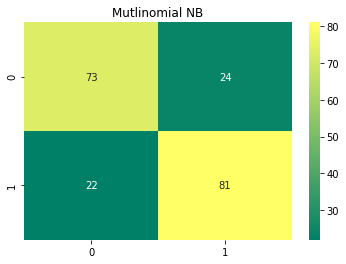

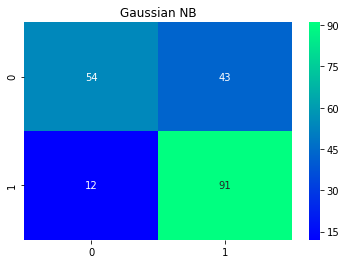

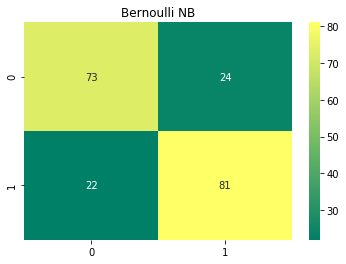

             precision    recall  f1-score   support

          0       0.77      0.75      0.76        97
          1       0.77      0.79      0.78       103

avg / total       0.77      0.77      0.77       200

             precision    recall  f1-score   support

          0       0.82      0.56      0.66        97
          1       0.68      0.88      0.77       103

avg / total       0.75      0.72      0.72       200

             precision    recall  f1-score   support

          0       0.77      0.74      0.76        97
          1       0.77      0.80      0.78       103

avg / total       0.77      0.77      0.77       200



In [26]:
sns.heatmap(cm_M,annot=True,cmap='summer')
plt.title('Mutlinomial NB')
plt.show()
sns.heatmap(cm_G,annot=True,cmap='winter')
plt.title('Gaussian NB')
plt.show()
sns.heatmap(cm_M,annot=True,cmap='summer')
plt.title('Bernoulli NB')
plt.show()
print(cr_M)
print(cr_G)
print(cr_B)

# Testing Model

In [48]:
test = 'I did not like it'

- 1 ->  postive review 
- 0 ->  negative reivew

In [49]:
review = test # change into i
# step -1: converting letter into lower case
review = review.lower()
# step -2: removing special character and numerics
review = re.sub('[^a-z]',' ',review)
# step -3: convert sentence into list of words -> tokens
review = review.split()
# step -4: Stemming(extracting root word) and removing stopwords
ps = PorterStemmer()
review = [ps.stem(word) for word in review if not word in set(stop)]
review = ' '.join(review)# step 5: joining words 
review

'not like'

In [50]:
test_arr = cv.transform([review]) # pass in list

In [51]:
result = model_M.predict(test_arr)
if result == 0:
    print('Positive Comment')
else:
    print('Negative Comment')

Positive Comment
